# Case Study plotting

In [1]:
### Import packages
import polars as pl
import pandas as pd
import numpy as np
import scipy as sp

# For plotting
import seaborn as sns
sns.set_theme(style="ticks")
sns.axes_style("darkgrid")
sns.set_theme()
import matplotlib.pyplot as plt

import sys
from os import getcwd
sys.path.append(getcwd())
import MultiStagePackage.OptMSPfunctions as msp
from MultiStagePackage.models import *

# For storing DataFrames
import pickle

models_numeric = [WT_aerob_growth,
                 WT_anaerob_growth, 
                 WT_anaerob_growth_arrest,
                 LC_aerob_growth,
                 LC_anaerob_growth, 
                 LC_anaerob_growth_arrest]

# initial conditions
X_0 = 0.1    # gDW/L
S_0 = 100.0  # mmol/L => max theoret c atoms for production = 6 atoms * S_0 (e.g.=100) = 600 c-atoms => 85% = 510
P_0 = 0.0    # mmol/L
s = np.array([X_0, S_0, P_0])

# Indexing
X, S, P = (i for i in range(len(s)))
r_S, r_P, mu = (i for i in range(3))

In the following only density=4 cases are observed:

In [2]:

stg1_ana_brf_all = msp.do_load('./Results/Computer_Stg1_ana_brf_All.pickle')

# Analytic brute force
stg2_ana_brf_all = msp.do_load('./Results/Computer_Stg2_ana_brf_All_den4.pickle')
stg2_ana_brf_1to3 = msp.do_load('./Results/Computer_Stg2_ana_brf_1to3_den4.pickle')
stg2_ana_brf_4to6 = msp.do_load('./Results/Computer_Stg2_ana_brf_4to6_den4.pickle')

stg3_ana_brf_all = msp.do_load('./Results/Computer_Stg3_ana_brf_All_den4.pickle')
stg3_ana_brf_1to3 = msp.do_load('./Results/Computer_Stg3_ana_brf_1to3_den4.pickle')
stg3_ana_brf_4to6 = msp.do_load('./Results/Computer_Stg3_ana_brf_4to6_den4.pickle')


# Numeric brute force
stg2_num_brf_all = msp.do_load('./Results/Computer_Stg2_ana_brf_All_den4.pickle')
stg2_num_brf_1to3 = msp.do_load('./Results/Computer_Stg2_ana_brf_1to3_den4.pickle')
stg2_num_brf_4to6 = msp.do_load('./Results/Computer_Stg2_ana_brf_4to6_den4.pickle')

stg3_num_brf_all = msp.do_load('./Results/Computer_Stg3_ana_brf_All_den4.pickle')
stg3_num_brf_1to3 = msp.do_load('./Results/Computer_Stg3_ana_brf_1to3_den4.pickle')
stg3_num_brf_4to6 = msp.do_load('./Results/Computer_Stg3_ana_brf_4to6_den4.pickle')

Check if numeric and analytic solutions match:

In [3]:
print(stg2_ana_brf_all.equals(stg2_num_brf_all))
print(stg2_ana_brf_1to3.equals(stg2_num_brf_1to3))
print(stg2_ana_brf_4to6.equals(stg2_num_brf_4to6))

print(stg3_ana_brf_all.equals(stg3_num_brf_all))
print(stg3_ana_brf_1to3.equals(stg3_num_brf_1to3))
print(stg3_ana_brf_4to6.equals(stg3_num_brf_4to6))

True
True
True
True
True
True


Get best results from dataframes:

In [4]:
dfs = [stg1_ana_brf_all,
       stg2_ana_brf_all,
       stg2_ana_brf_1to3,
       stg2_ana_brf_4to6,
       stg3_ana_brf_all,
       stg3_ana_brf_1to3,
       stg3_ana_brf_4to6]

best_res=pd.DataFrame(columns=list(stg1_ana_brf_all.columns))
for df in dfs:
    best_res=pd.concat([best_res,df.sort_values(["Vol_P"], ascending=[False]).dropna(axis=0).drop_duplicates(subset="Models", keep="first")[:1]]) 

display(best_res)   

,Index,Times,Models,End_T,End_X,End_S,End_P,finished,Vol_P,Y_SubInput,Y_SubUsed
1,2,"(0.0, 24.0)",[2],16.95,0.91,0.0,161.87,1,9.55,1.62,1.62
134,135,"(0.0, 4.5, 24.0)","[1, 5]",7.79,1.26,0.0,155.86,2,20.01,1.56,1.56
44,45,"(0.0, 4.5, 24.0)","[1, 2]",8.44,1.73,0.0,139.84,2,16.56,1.40,1.40
48,49,"(0.0, 4.75, 24.0)","[4, 5]",8.00,1.31,0.0,159.21,2,19.91,1.59,1.59
18410,18411,"(0.0, 2.75, 4.75, 24.0)","[1, 4, 5]",7.79,1.36,0.0,156.47,3,20.09,1.56,1.56
500,501,"(0.0, 2.5, 4.5, 24.0)","[1, 1, 2]",8.44,1.73,0.0,139.84,3,16.56,1.40,1.40
450,451,"(0.0, 1.0, 4.75, 24.0)","[4, 4, 5]",8.00,1.31,0.0,159.21,3,19.91,1.59,1.59


In [5]:
# Without 3 Stage 1to3 and 3 Stage 4to6
dfs = [stg1_ana_brf_all,
       stg2_ana_brf_all,
       stg2_ana_brf_1to3,
       stg2_ana_brf_4to6,
       stg3_ana_brf_all]
best_res=pd.DataFrame(columns=list(stg1_ana_brf_all.columns))
for df in dfs:
    best_res=pd.concat([best_res,df.sort_values(["Vol_P"], ascending=[False]).dropna(axis=0).drop_duplicates(subset="Models", keep="first")[:1]]) 

display(best_res)   

,Index,Times,Models,End_T,End_X,End_S,End_P,finished,Vol_P,Y_SubInput,Y_SubUsed
1,2,"(0.0, 24.0)",[2],16.95,0.91,0.0,161.87,1,9.55,1.62,1.62
134,135,"(0.0, 4.5, 24.0)","[1, 5]",7.79,1.26,0.0,155.86,2,20.01,1.56,1.56
44,45,"(0.0, 4.5, 24.0)","[1, 2]",8.44,1.73,0.0,139.84,2,16.56,1.40,1.40
48,49,"(0.0, 4.75, 24.0)","[4, 5]",8.00,1.31,0.0,159.21,2,19.91,1.59,1.59
18410,18411,"(0.0, 2.75, 4.75, 24.0)","[1, 4, 5]",7.79,1.36,0.0,156.47,3,20.09,1.56,1.56


Create summary plot (with adjusted customPlot() function):

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

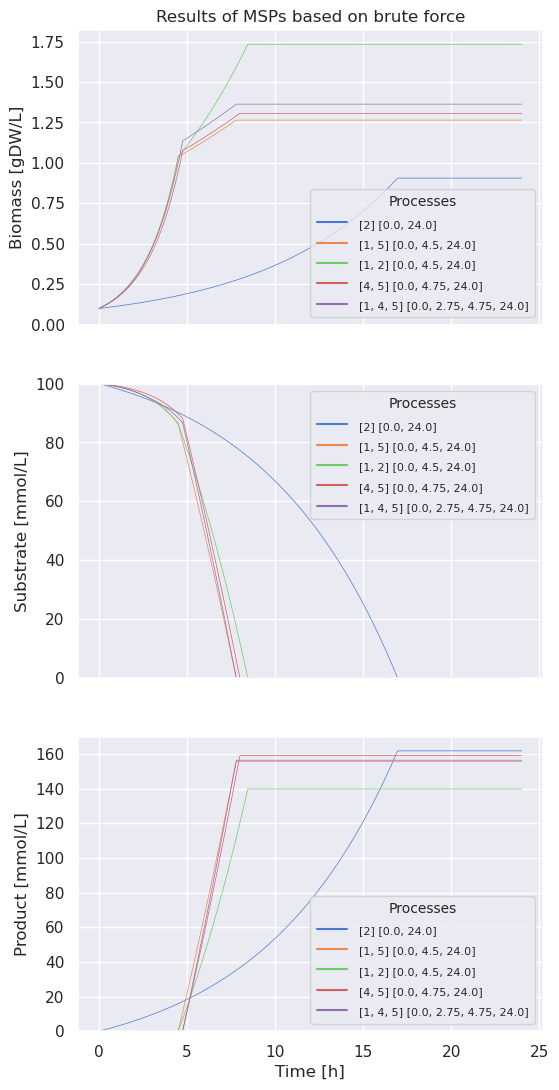

In [7]:
def event_sub0(t,y):
    if(y[S] <= 0.001):
        return 0    # 0 that event triggers
    return 1

text=['1-Stg', '2*-Stg', '2-Stg 1to3', '2-Stg 4to6','3*-Stg']
figure = msp.do_custom_plot(df=best_res, 
                   models_num=models_numeric, 
                   s=s, 
                   title="Results of MSPs based on brute force",
                   events=[event_sub0],
                   indexes=[X,S,P],
                   palette="muted")

figure.gcf().set_size_inches(6, 13)
plt.savefig('Results_brf.png', format='png')

### Create zoom image

In [80]:

def do_custom_plot2(df, models_num, s, title, events, arguments=None, indexes=[0,1,2], step=0.01, palette="viridis", biomass_ylab='Biomass [gDW/L]', substrate_ylab='Substrate [mmol/L]', product_ylab='Product [mmol/L]'):
    '''
    This functions generates plots of biomass, substrate and product for the provided combinations of df

    Parameters:
    df (dataframe)              : dataframe you get from:
    models_num (list of functions): numeric models
    s (array)                   : start values for biomass, substrate, product
    title (string)              : title of plot displayed at the top
    events (list of functions): events such as event_sub0 (trigger at specific time points in integration)
    arguments (array)           : additional auxiliary variables for models (e.g. rates)
    indexes (array)             : array of indexes denoting at which index biomass, substrate, product (exactly in this order) occur
    step (float)                : maximal step size in integrator scipy.integrate.solve_ivp() as float and default=0.01
    with_lines (Boolean)        : Decide if additional lines in the plot should be displayed; Default: False
    palette (string)            : color palette to use; Default: "viridis"
    biomass_ylab (string)       : Biomass y label in plot; Default: 'Biomass [gDW/L]'
    substrate_ylab (string)     : Substrate y label in plot; Default: 'Substrate [mmol/L]'
    product_ylab (string)       : Product y label in plot; Default: 'Product [mmol/L]'

    Returns:
    plot object
    '''
    arguments_start=arguments
    infos = msp.do_tuple_to_list(df)

    ## Here we do no want to terminate the integration when substrate is 0
    events[0].terminal = False

    times  = infos[0]
    combis = infos[1]
    
    dat = pd.DataFrame()
    palette = sns.color_palette(palette,n_colors=len(combis)) # https://seaborn.pydata.org/tutorial/color_palettes.html
    fig, axs = plt.subplots(nrows=3, ncols=1, sharex=True, figsize=(5,12))
    combi_list = []
    text=['1-Stg', '2*-Stg', '2-Stg 1to3', '2-Stg 4to6','3*-Stg']
    ## The loop for all the different modi
    for i in range(len(combis)):
        curr_combi= combis[i]
        curr_combi = [x-1 for x in curr_combi] # Prepare for correct indexing starting from 0
        curr_times = list(times[i])

        ## Simulate ODE
        finished=0
        s0=s
        results=pd.DataFrame()
        arguments=arguments_start

        while len(curr_times)>1:
            finished= finished+1
            
            r = sp.integrate.solve_ivp(models_num[int(curr_combi[0])], t_span=[curr_times[0], curr_times[1]], y0=s0, t_eval=[curr_times[1]], args=arguments, events=events, dense_output=True, max_step=step)
            t = np.linspace(curr_times[0], curr_times[1], (int(curr_times[1])+1)*20) # (times[1]+1)*20 = Resolution
            try:
                res = [ r.y_events[0][0][species] for species in range(len(s)) ]
                res = res + [r.t_events[0][0]]
            except:
                res = [ r.y[species][0] for species in range(len(s)) ]
                res = res + [r.t[0]]


            dat_add= pd.DataFrame(data={    'Time [h]'  : t, 
                                            'Biomass'   : r.sol(t)[indexes[0]],
                                            'Substrate' : r.sol(t)[indexes[1]],
                                            'Product'   : r.sol(t)[indexes[2]]})
            results= pd.concat([results, dat_add])
            ## Drop the first element from combination and time
            # e.g.          (0,1,2) and (0.0, 2.0, 3.0, 24.0)
            # will become   (  1,2) and (     2.0, 3.0, 24.0)
            curr_combi.pop(0)
            curr_times.pop(0)
            s0=res[:-1]

        curr_times = [round(x,2) for x in list(times[i])]
        combi_str       = " ".join(str(x) for x in (combis[i],curr_times)) # For displaying in the plot

        results['Processes']=text[i]+"  "+str(combis[i])
        
        ## DataFrame
        dat= pd.concat([dat, results]) # res[1] = DataFrame with all Time, Biomass, Substrate and Product columns and times in rows
        combi_list.append(combi_str)
        
    display(dat)
    
    # Biomass plot
    sns.lineplot(
        data=dat,
        x="Time [h]", y="Biomass",
        hue="Processes", #col=columns,
        #kind="line",# size_order=["T1", "T2"], 
        palette=palette,
        #height=5, aspect=.75, facet_kws=dict(sharex=False), 
        linewidth=0.5,
        ax=axs[0],
        legend=True
    ).set(title=title, ylim=(0, dat["Biomass"].max()*1.05))
    plt.setp(axs[0].get_legend().get_texts(), fontsize='8')
    plt.setp(axs[0].get_legend().get_title(), fontsize='10')
    plt.setp(axs[0].set_ylabel(biomass_ylab))
    
    # Substrate plot
    sns.lineplot(
        data=dat,
        x="Time [h]", y="Substrate",
        hue="Processes", #col="align",
        #kind="line",# size_order=["T1", "T2"], 
        palette=palette,
        #height=5, aspect=.75, facet_kws=dict(sharex=False), 
        linewidth=0.5,
        ax=axs[1],
        legend=True
    ).set(ylim=(0, int(s[indexes[1]]*1.05)))
    plt.setp(axs[1].get_legend().get_texts(), fontsize='8')
    plt.setp(axs[1].get_legend().get_title(), fontsize='10')
    plt.setp(axs[1].set_ylabel(substrate_ylab))
    

    # Product plot
    sns.lineplot(data=dat, 
        x="Time [h]", y="Product", 
        hue="Processes", #col="align",
        #kind="line",# size_order=["T1", "T2"], 
        palette=palette,
        #height=5, aspect=.75, facet_kws=dict(sharex=False), 
        linewidth=0.5,
        ax=axs[2],
        legend=True
    ).set(ylim=(0, dat["Product"].max()*1.05))
    plt.setp(axs[2].get_legend().get_texts(), fontsize='8')
    plt.setp(axs[2].get_legend().get_title(), fontsize='10')
    plt.setp(axs[2].set_ylabel(product_ylab))
    # axs[2].axhline((s[S]*6)*0.85) # 85% theoretical product 


    # Define the area for the zoomed portion
    # x1, x2, y1, y2 = 2, 10, 0, 1.75
    # axs[0].plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], "r--")
    x1, x2, y1, y2 = 5, 18, 0.75, 20
    axs[1].plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], "r--")
    x1, x2, y1, y2 = 11, 24, 135, 165
    axs[2].plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], "r--")

    plt.tight_layout()
    plt.savefig("BruteForce1.png", dpi=300)
    plt.show()


    # Create main plot
    fig, axs = plt.subplots(2, 1, figsize=(5, 5))


    # Create zoomed plot on the second subplot
    # sns.lineplot(
    #     data=dat,
    #     x="Time [h]", y="Biomass",
    #     hue="Processes",
    #     palette=palette,
    #     linewidth=0.5,
    #     ax=axs[3],
    #     legend=False)
    # # ).set(title=title, ylim=(0, dat["Biomass"].max()*1.05))
    # axs[0].set_xlim(x1, x2)
    # axs[0].set_ylim(y1, y2)

    x1, x2, y1, y2 = 5, 18, 0.5, 20
    sns.lineplot(
        data=dat,
        x="Time [h]", y="Substrate",
        hue="Processes", 
        palette=palette,
        linewidth=0.5,
        ax=axs[0],
        legend=False)
    # ).set(ylim=(0, int(s[indexes[1]])))
    axs[0].set_xlim(x1, x2)
    axs[0].set_ylim(y1, y2)
    plt.setp(axs[0].set_ylabel(substrate_ylab))
    x1, x2, y1, y2 = 5.05, 17.9, 0.6, 19.85
    axs[0].plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], "r--")

    x1, x2, y1, y2 = 15, 24, 135, 165
    sns.lineplot(data=dat, 
        x="Time [h]", y="Product", 
        hue="Processes",
        palette=palette,
        linewidth=0.5,
        ax=axs[1],
        legend=False)
    # ).set(ylim=(0, dat["Product"].max()*1.05))
    axs[1].set_xlim(x1, x2)
    axs[1].set_ylim(y1, y2)
    plt.setp(axs[1].set_ylabel(product_ylab))
    x1, x2, y1, y2 = 15.05, 23.95, 135.5, 164.7
    axs[1].plot([x1, x1, x2, x2, x1], [y1, y2, y2, y1, y1], "r--")

    
    plt.tight_layout()
    plt.savefig("BruteForce2.png", dpi=300)
    plt.show()

    return plt

,Time [h],Biomass,Substrate,Product,Processes
0,0.000000,0.100000,100.000000,0.000000,1-Stg [2]
1,0.048096,0.100627,99.922178,0.125973,1-Stg [2]
2,0.096192,0.101258,99.843867,0.252735,1-Stg [2]
3,0.144289,0.101893,99.765066,0.380293,1-Stg [2]
4,0.192385,0.102533,99.685770,0.508651,1-Stg [2]
...,...,...,...,...,...
495,23.845691,1.363211,0.000840,156.472759,"3*-Stg [1, 4, 5]"
496,23.884269,1.363211,0.000840,156.472759,"3*-Stg [1, 4, 5]"
497,23.922846,1.363211,0.000840,156.472759,"3*-Stg [1, 4, 5]"
498,23.961423,1.363211,0.000840,156.472759,"3*-Stg [1, 4, 5]"


  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

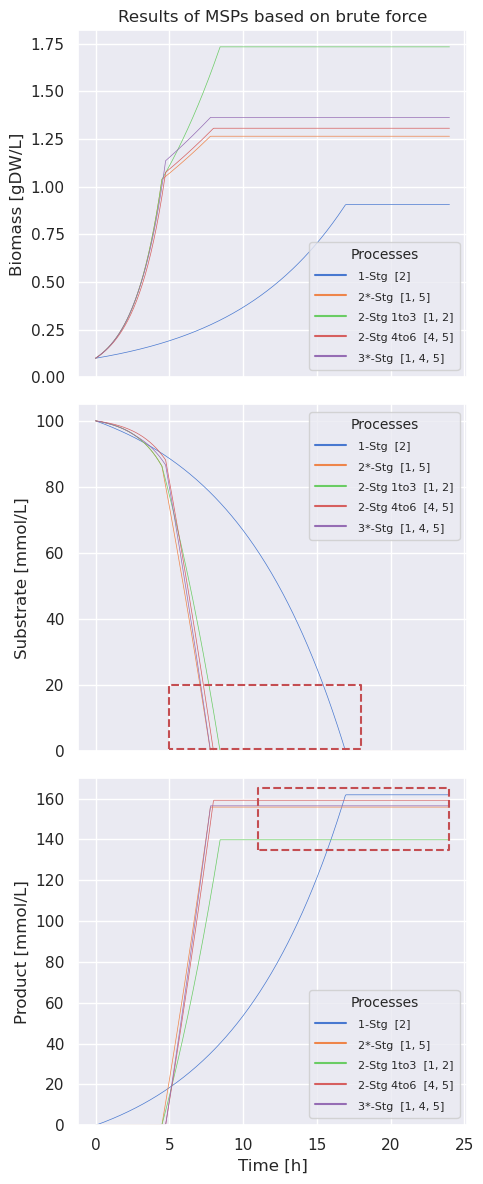

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array and two offsets from the bottom left corner of the image
  alpha: scalar or None
  animated: bool
  backgroundcolor: color
  bbox: dict with properties for `.patches.FancyBboxPatch`
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  figure: `.Figure`
  fontfamily or family: {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
  fontproperties or font or font_properties: `.font_manager.FontProperties` or `str` or `pathlib.Path`
  fontsize or size: float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'}
  fontstretch or stretch: {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'}
  fontstyle or style: {'normal', 'italic', 'oblique'}
  fontvariant or var

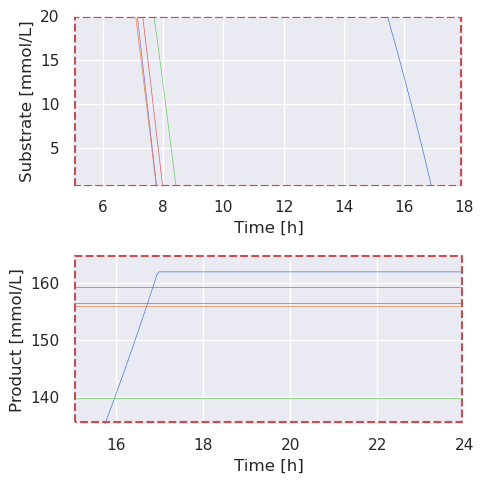

In [81]:
def event_sub0(t,y):
    if(y[S] <= 0.001):
        return 0    # 0 that event triggers
    return 1

figure = do_custom_plot2(df=best_res, 
                   models_num=models_numeric, 
                   s=s, 
                   title="Results of MSPs based on brute force",
                   events=[event_sub0],
                   indexes=[X,S,P],
                   palette="muted")